## Final Project Submission


* Student name: Andi Osika
* Student pace: part time
* Scheduled project review date/time: na
* Instructor name: James Irving, PhD
* Blog post URL: TBD



![Covid19](http://localhost:8888/view/c0481846-wuhan_novel_coronavirus_illustration-spl.jpg)

## Background:

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus that has escalated into a global pandemic.

According to the [World Health Organization](https://www.who.int/health-topics/coronavirus#tab=tab_1), most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. In response, much data has been collected in various ways to further inform ways to slow the spread. 

This dataset was created by a project created by a UK based platform-solutions company called [Nexoid]( https://www.nexoid.com/). 

At the start of the pandemic, Nexoid noted that there was a lack of large datasets required to predict the spread and mortality of COVID-19. They took it upon themselves to create and share this dataset as an effort to better understand these factors. It is a not-for-profit project with the goal of providing researchers and governments the data needed to help understand and fight COVID-19.

The data is collected here: 
https://www.covid19survivalcalculator.com/

A risk of infection and mortality are returned to the user based on Nexoid's model which is not publicly sharded, yet recorded in this dataset post-hoc.  These values are reflected in the columns risk_infection and risk_mortality.

The intention of this classification project is to seek primary contributing factors for contracting covid19.

In [1]:
##Importing dataset
import pandas as pd
df = pd.read_csv("master_dataset4.csv")
pd.set_option('display.max_columns', 0)
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


### Features and Descriptions:

**Feature** | **Description**
--|--
survey_date|The date the survey was submitted
region	
country |The country collected from IP address long, lat
ip_latitude	|ip latitude of device at time of survey
ip_longitude |ip longitude of device at time of survey	
ip_accuracy	|-n/a
sex	|Self reported sex
age	| Self reported age based on birthdate
height |Height in cm
weight | Weight in kg
bmi	| Body Mass Index as calculated from self-reported height and weight
blood_type	| Blood type
smoking	| reported smoking/vapeing habits (never, do, 1-5x, 6-20x, 20+, quit<5yrs, quit>5yrs, quit>10yrs
alcohol	| reported days of alcohol consuption in last 14 days 
cannabis | reported days of cannabis consumpiton in last 28 days
amphetamines | reported days of amphetamine consumpiton in last 28 days	
cocaine	| reported days of cocaine consumpiton in last 28 days
lsd	| reported days of lsd consumpiton in last 28 days
mdma | reported days of mdma(ecstacy) consumpiton in last 28 days	
contacts_count	| reported contacts in the last week (1-20 and 20+)
house_count	| how many people live in the subjects dwelling
text_working | work/school travel behaviors (0-5 never did, always did, have stopped, critical only, still do)
rate_government_action	| scale of attitude that government is taking covid-19 seriously (disagree, neutral, agree)
rate_reducing_risk_single | scale of self-assesment to reduce risk(social distancing, hand washing) (disagree, neutral, agree)
rate_reducing_risk_house | scale of assessesed co-habitators risk reduction (social distancing, hand washing)(disagree, neutral, agree)	
rate_reducing_mask	| scale of how often a mask is worn outside dwelling 1-5 rarely, sometimes, usually)
covid19_positive | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_symptoms | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_contact	|A binomial value 0=no, 1=yes to the question "Have you been in contact with someone who has tested positive?"
asthma | A binomial value 0=no, 1=yes to the question "Do you have?"
kidney_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
compromised_immune |  A binomial value 0=no, 1=yes to the question "Do you have?"
heart_disease | A binomial value 0=no, 1=yes to the question "Do you have?"	
lung_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
diabetes | A binomial value 0=no, 1=yes to the question "Do you have?"
hiv_positive | A binomial value 0=no, 1=yes to the question "Do you have?"
hypertension | A binomial value 0=no, 1=yes to the question "Do you have?"
other_chronic | A binomial value 0=no, 1=yes to the question "Do you have?"
prescription_medication | Reported prescription medications
opinion_infection | A binomial value 0=no, 1=yes to the question "Do you have?"
opinion_mortality | A binomial value 0=no, 1=yes to the question "Do you have?"
risk_infection | cacl'd risk for infection (based on their models, dropped since this value is calculated after data collection)
risk_mortality | cacl'd risk for mortality (based on their models)

### Software Package Installs:

In [2]:
# other imports 
import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
import functions as fn
import importlib

from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


2020-04-20 19:09:17.198862-07:00
[i] Timer started at04/20/20 - 07:09 PM
[i] Timer ended at 04/20/20 - 07:09 PM
- Total time = 0:00:00


C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Inspecting the dataset:

This set of data contains just over 619K entries and has 43 columns of both numeric and categorical data.  Because of the size of this dataset, pandas profiling was used to inform potential considerations for dataset selection and develop a strategy to manage preprocessing of a set this size.

In [3]:
profile = ProfileReport(df, minimal=True)
profile

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619027 entries, 0 to 619026
Data columns (total 43 columns):
survey_date                  619027 non-null object
region                       42296 non-null object
country                      619010 non-null object
ip_latitude                  619027 non-null float64
ip_longitude                 619027 non-null float64
ip_accuracy                  619026 non-null float64
sex                          619027 non-null object
age                          619027 non-null object
height                       619027 non-null int64
weight                       619027 non-null int64
bmi                          619027 non-null float64
blood_type                   619027 non-null object
smoking                      617174 non-null object
alcohol                      617174 non-null float64
cannabis                     606540 non-null float64
amphetamines                 591599 non-null float64
cocaine                      589898 non-null float64


### Data Background Observation: 
The data was provided by subjects from 173 countries.  It is noted that 87% of the data comes from the US.  The next top provider of data is Canada ~5% , followed by the United Kingdom ~2.3%:

In [5]:
print(df['country'].value_counts(normalize=True))
countriesdf= pd.DataFrame(df['country'].value_counts())
countriesdf.head(20)

US    0.878483
CA    0.049560
GB    0.023211
AU    0.011354
BR    0.005552
        ...   
LI    0.000002
SR    0.000002
CM    0.000002
SN    0.000002
BW    0.000002
Name: country, Length: 173, dtype: float64


,country
US,543790
CA,30678
GB,14368
AU,7028
BR,3437
MX,1740
DE,1415
PH,1117
RU,831
NZ,705


### Inspecting correlations:

In [6]:
df.corr()['covid19_positive'].sort_values(ascending=False)

covid19_positive             1.000000
risk_infection               0.198632
covid19_symptoms             0.089861
opinion_infection            0.054837
covid19_contact              0.050774
risk_mortality               0.014074
mdma                         0.012152
heart_disease                0.007975
weight                       0.007503
lsd                          0.007137
height                       0.006999
cocaine                      0.006833
rate_reducing_mask           0.006201
ip_longitude                 0.006122
diabetes                     0.005700
kidney_disease               0.004725
other_chronic                0.004638
compromised_immune           0.004308
bmi                          0.004280
hypertension                 0.004055
hiv_positive                 0.003993
contacts_count               0.003741
ip_latitude                  0.003448
lung_disease                 0.003296
amphetamines                 0.002425
asthma                       0.001956
house_count 

In [7]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1) 

,ip_latitude,ip_longitude,ip_accuracy,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,risk_infection,risk_mortality
ip_latitude,1.0,-0.47,-0.035,0.0054,0.025,0.024,-0.0015,0.034,-0.0043,0.0033,-0.0053,-0.015,-0.022,-0.01,0.026,0.0078,0.0062,-0.023,0.0034,0.0096,0.0052,0.0078,-0.00053,0.0046,-0.0045,0.0018,0.0016,-0.01,-0.0054,0.0042,0.031,0.0072,0.025,-0.004
ip_longitude,-0.47,1.0,-0.018,0.027,-0.044,-0.058,-0.0067,-0.052,-0.008,-0.00027,-0.0037,0.016,-0.029,-0.016,0.071,0.011,0.0086,-0.029,0.0061,0.0088,-0.0084,-0.001,-0.0014,-0.013,-5.9e-06,-0.0033,-0.018,0.00038,-0.027,0.00099,-0.024,-0.0062,-0.04,-0.012
ip_accuracy,-0.035,-0.018,1.0,0.0081,0.016,0.014,-0.025,0.008,0.014,0.0067,0.0031,0.0022,0.098,0.036,0.011,-0.034,-0.027,-0.021,-0.0013,-0.003,0.007,-0.0089,0.0025,-0.003,0.00049,0.0031,-0.00014,-0.0014,0.0021,-0.0082,0.00022,-0.00086,0.1,-0.015
height,0.0054,0.027,0.0081,1.0,0.39,-0.096,0.11,0.047,0.013,0.043,0.052,0.047,0.013,-0.06,0.013,-0.012,0.029,-0.046,0.007,-0.0065,-0.0055,-0.067,0.0015,-0.057,0.025,-0.0065,0.028,0.036,0.056,-0.053,-0.031,-0.096,0.036,0.085
weight,0.025,-0.044,0.016,0.39,1.0,0.87,-0.066,-0.012,-0.0019,-0.0032,-0.0009,-0.0059,0.055,0.00021,-0.019,-0.014,-0.0029,-0.029,0.0075,0.0036,-0.0046,0.047,0.012,0.0096,0.041,0.012,0.17,0.0094,0.22,0.02,0.018,0.1,0.065,0.065
bmi,0.024,-0.058,0.014,-0.096,0.87,1.0,-0.13,-0.033,-0.0071,-0.023,-0.024,-0.026,0.053,0.029,-0.027,-0.0085,-0.018,-0.0073,0.0043,0.0072,-0.0027,0.085,0.012,0.04,0.031,0.016,0.17,-0.0066,0.21,0.049,0.033,0.16,0.052,0.027
alcohol,-0.0015,-0.0067,-0.025,0.11,-0.066,-0.13,1.0,0.076,0.037,0.11,0.096,0.11,-0.011,-0.059,-0.011,-0.015,0.0059,-0.038,-0.0041,-0.0044,0.0058,-0.028,-0.012,-0.05,-0.013,-0.014,-0.071,0.011,-0.0078,-0.053,0.025,-0.076,-0.022,0.024
cannabis,0.034,-0.052,0.008,0.047,-0.012,-0.033,0.076,1.0,0.083,0.17,0.21,0.2,0.012,-0.0073,-0.09,-0.015,-0.021,-0.0054,-0.0044,0.013,-0.021,0.033,0.002,0.026,-0.0052,0.014,-0.022,0.025,-0.031,0.03,0.038,0.05,-0.0053,-0.043
amphetamines,-0.0043,-0.008,0.014,0.013,-0.0019,-0.0071,0.037,0.083,1.0,0.18,0.2,0.21,0.028,0.011,-0.013,-0.041,-0.035,-0.0091,0.0024,0.013,0.011,0.011,0.0095,0.017,0.0085,0.016,0.0025,0.031,0.011,0.015,0.016,0.021,0.035,0.015
cocaine,0.0033,-0.00027,0.0067,0.043,-0.0032,-0.023,0.11,0.17,0.18,1.0,0.44,0.47,0.027,0.004,-0.028,-0.063,-0.049,-0.027,0.0068,0.014,0.0054,0.011,0.018,0.013,0.014,0.019,0.0011,0.059,-0.0064,0.0014,0.012,0.0096,0.041,0.033


Initial visual inspection of null values indicates that region and prescription medication are sparsely populated.  The opinion_infections and opinion_mortality columns are also a little 'light' in terms of responses. Other than that, there doesn't seem to be be any clear, apparent patterns for incomplete data. (See below)

## Preprocessing:

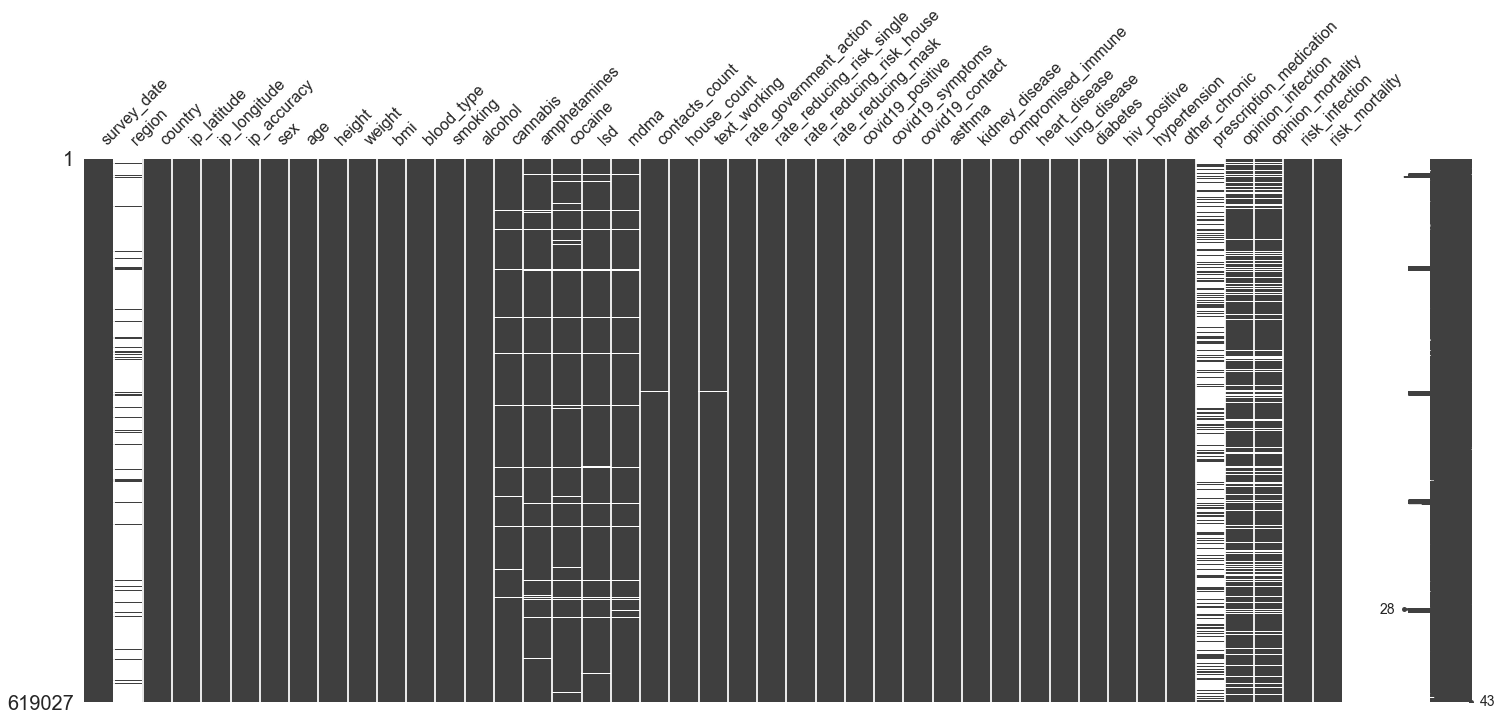

In [8]:
import missingno
missingno.matrix(df)

Aditional inspection shows that there are quite a few columns with less than 5% null values.  Since this dataset is so large, it seems reasonable to remove these.  Details follow:

In [9]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls


,variable,%_Null
1,region,93.167342
38,prescription_medication,68.800876
40,opinion_mortality,17.445604
39,opinion_infection,17.445604
16,cocaine,4.705611
15,amphetamines,4.430825
17,lsd,4.089644
18,mdma,3.513255
14,cannabis,2.017198
21,text_working,0.683654


In [10]:
cols_to_drop_na = ['country','ip_accuracy','smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 
                   'contacts_count', 'text_working', 'rate_reducing_mask', 'risk_infection',
                  'risk_mortality']

In [11]:
df.dropna(subset=cols_to_drop_na, inplace=True)

In [12]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
1,region,93.322091
38,prescription_medication,68.619982
40,opinion_mortality,16.900436
39,opinion_infection,16.900436
30,kidney_disease,0.000000
23,rate_reducing_risk_single,0.000000
24,rate_reducing_risk_house,0.000000
25,rate_reducing_mask,0.000000
26,covid19_positive,0.000000
27,covid19_symptoms,0.000000


### dropping date

While the date the data was collected could have a bearing on whether or not someone tested postivie, it would not provide insight to biologic or behavioral indicators

In [13]:
df['survey_date'].unique()

array(['4/4/2020', '4/5/2020', '4/3/2020', '4/6/2020', '3/27/2020',
       '3/28/2020', '3/26/2020', '3/29/2020', '3/30/2020', '3/31/2020',
       '4/1/2020', '4/2/2020', '4/7/2020', '4/8/2020', '4/9/2020',
       '4/10/2020'], dtype=object)

In [14]:
df.drop('survey_date', axis=1, inplace=True)

### Dropping Region as a feature due to lack of complete data, as well as  lat/long and will use country for geographic information

In [15]:
df['region'].value_counts()

EU    22523
OC     6965
SA     4103
AS     4073
AF      748
Name: region, dtype: int64

In [16]:
df['region'].isnull().sum()/len(df)

0.9332209106239461

In [17]:
cols_to_drop = ['region','ip_latitude', 'ip_longitude']


In [18]:
df.drop(cols_to_drop, axis=1, inplace=True)

### DEAL WITH Dealing with how to impute 'opinions'

In [19]:
df.loc[df['opinion_mortality'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [20]:
df.loc[df['opinion_infection'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [21]:
df['covid19_positive'].value_counts(normalize=True)

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64

Since these two columns scale to reflect opinion tend to not have a higher incidence in those that tested positive for covid, initially a feature to indicate null values will be created and an average average value of 50 will be imputed.  Should the model indicate relevance, or demonstrate necessity for improvment, this feature can be adjusted.

In [22]:
df['opinion_mortality'].value_counts(normalize=True)

5.0     0.460670
15.0    0.178922
25.0    0.106206
45.0    0.065505
55.0    0.059436
35.0    0.057783
65.0    0.023647
75.0    0.023350
85.0    0.014222
95.0    0.010262
Name: opinion_mortality, dtype: float64

In [23]:
#use median /mean to fill
df['opinion_mortality'].median()

15.0

In [24]:
df['omwasnull'] = df['opinion_mortality'].isna()

In [25]:
df['opinion_mortality'].fillna(15.0, inplace=True)

In [26]:
df['omwasnull'].head(3)

0    False
1    False
2     True
Name: omwasnull, dtype: bool

In [27]:
df['oiwasnull'] = df['opinion_infection'].isna()

In [28]:
df['opinion_infection'].median()

35.0

In [29]:
df['opinion_infection'].fillna(35, inplace=True)

> A quick look to make sure the nulls are gone:

In [30]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
34,prescription_medication,68.619982
0,country,0.000000
30,diabetes,0.000000
23,covid19_symptoms,0.000000
24,covid19_contact,0.000000
25,asthma,0.000000
26,kidney_disease,0.000000
27,compromised_immune,0.000000
28,heart_disease,0.000000
29,lung_disease,0.000000


### Prescription Medication contains: 57,106 distinct values
*from profile report

In [31]:
df['prescription_medication'].value_counts()

LEVOTHYROXINE SODIUM                                                                                                                                                         9480
SERTRALINE HYDROCHLORIDE                                                                                                                                                     5979
ESCITALOPRAM OXALATE                                                                                                                                                         3848
LISINOPRIL                                                                                                                                                                   3777
AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXTROAMPHETAMINE SACCHARATE;DEXTROAMPHETAMINE SULFATE                                                                             2907
                                                                                                              

In [32]:
##creating a column to track lack of prescription medication:
df['taking_prescription_medication'] = df['prescription_medication'].notnull()


In [33]:
#filling in null values with a value of "NONE" to indicate they are taking no meds
df['prescription_medication'].fillna('NO', inplace=True)

In [34]:
split_data = df["prescription_medication"].str.split(";")
meds = split_data.to_list()

meds_df = pd.DataFrame(meds)
meds_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [35]:
meds1 = pd.DataFrame(df['prescription_medication'].unique())
meds1.columns = ['Prescriptions']
meds1['Prescriptions'].str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,HYDROCHLOROTHIAZIDE,LOSARTAN POTASSIUM,METHYLPHENIDATE,OMEPRAZOLE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,CLONAZEPAM,ETHINYL ESTRADIOL,NORGESTIMATE,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53996,ALPRAZOLAM,AMITRIPTYLINE HYDROCHLORIDE,DULAGLUTIDE,GLIMEPIRIDE,LISINOPRIL,PRAVASTATIN SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53997,BUPROPION HYDROCHLORIDE,FEXOFENADINE HYDROCHLORIDE,GABAPENTIN,MELOXICAM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53998,CONJUGATED ESTROGENS/MEDROXYPROGESTERONE ACETATE,CYCLOBENZAPRINE HYDROCHLORIDE,EMPAGLIFLOZIN,ESCITALOPRAM OXALATE,IBUPROFEN,LEVOTHYROXINE SODIUM,LISINOPRIL,LORATADINE,METFORMIN HYDROCHLORIDE,SITAGLIPTIN PHOSPHATE,OMEPRAZOLE,ZOLPIDEM TARTRATE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53999,AMPHETAMINE ASPARTATE,AMPHETAMINE SULFATE,DEXTROAMPHETAMINE SACCHARATE,DEXTROAMPHETAMINE SULFATE,ETHINYL ESTRADIOL,NORETHINDRONE,FEXOFENADINE HYDROCHLORIDE,MONTELUKAST SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575210 entries, 0 to 619026
Data columns (total 42 columns):
country                           575210 non-null object
ip_accuracy                       575210 non-null float64
sex                               575210 non-null object
age                               575210 non-null object
height                            575210 non-null int64
weight                            575210 non-null int64
bmi                               575210 non-null float64
blood_type                        575210 non-null object
smoking                           575210 non-null object
alcohol                           575210 non-null float64
cannabis                          575210 non-null float64
amphetamines                      575210 non-null float64
cocaine                           575210 non-null float64
lsd                               575210 non-null float64
mdma                              575210 non-null float64
contacts_count              

### Biological Features: 
* Height, weight, BMI and sex

In [37]:
def des(feature):
    import seaborn as sns
    
    y = feature.value_counts()
    z = feature.describe()

    display( "------------- Value Counts: -----------"
            ,y, "-------------- Description: ---------"
            , z)
    
#     x = sns.boxplot(feature)
    
#     return x
    
    


In [38]:
des(df['sex'])

'------------- Value Counts: -----------'

female    402914
male      170211
other       2085
Name: sex, dtype: int64

'-------------- Description: ---------'

count     575210
unique         3
top       female
freq      402914
Name: sex, dtype: object

### Observations on height: potential outliers to remove: <140cm and >200cm

In [39]:
des(df['height'])

'------------- Value Counts: -----------'

164    56519
166    47982
168    47254
172    43838
162    40631
       ...  
222        6
220        6
224        5
218        5
236        2
Name: height, Length: 65, dtype: int64

'-------------- Description: ---------'

count    575210.000000
mean        169.063834
std          11.101964
min         110.000000
25%         162.000000
50%         168.000000
75%         176.000000
max         238.000000
Name: height, dtype: float64

### Observations on weight:  outliers over ~150kilos

In [40]:
def bxplt(col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    """Returns vizual information on
    outliers, value counts and description
    
    args:
    col - df['column'], the column name from 
    a pd.DataFrame
    """
    import seaborn as sns
    
    y = col.value_counts()
    z = col.describe()
    
    x = sns.boxplot(col)
    
#     return x

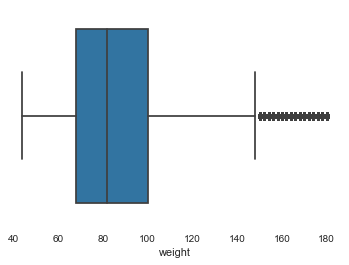

In [41]:
bxplt(df['weight'])

### Age needs was encoded

Age values were encoded based on the median of each age group.


In [42]:
df['age'].value_counts()

30_40      186191
20_30      148259
40_50      116578
50_60       59158
60_70       31074
10_20       18643
70_80        8896
0_10         4407
80_90        1634
90_100        353
100_110        17
Name: age, dtype: int64

In [43]:
age_map = {'0_10' : 5,
          '10_20': 15,
          '20_30' : 25,
          '30_40': 35,
          '40_50': 45,
          '50_60': 55,
          '60_70': 65,
          '70_80': 75,
          '80_90': 85,
          '90_100': 95,
          '100_110': 105}

df['age'] = df['age'].map(age_map)
df['age'].describe()

count    575210.000000
mean         38.048295
std          13.437588
min           5.000000
25%          25.000000
50%          35.000000
75%          45.000000
max         105.000000
Name: age, dtype: float64

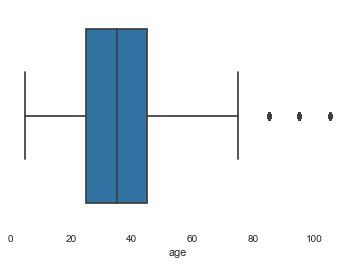

In [44]:
import seaborn as sns
sns.boxplot(df['age']);
plt.show()

### BMI 

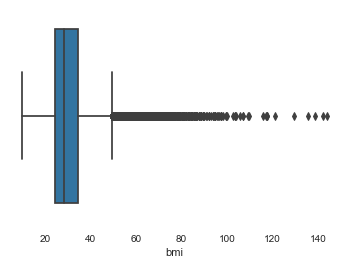

In [45]:
bxplt(df['bmi'])

###  Blood Type, smoking need to be encoded

In [46]:
df['blood_type'].value_counts()

unknown    194513
op         123124
ap         107469
on          50693
bp          35975
an          28422
abp         19503
bn           9277
abn          6234
Name: blood_type, dtype: int64

In [47]:
df['smoking'].value_counts()

never        326888
quit10        55446
yesmedium     50580
vape          37695
quit5         34618
quit0         33149
yeslight      26606
yesheavy      10228
Name: smoking, dtype: int64

### Alcohol & Drugs: Numeric, some/moderate outliers

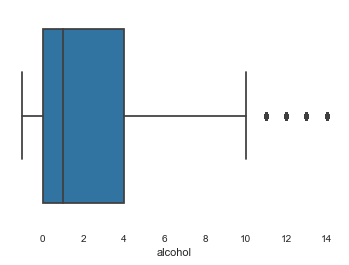

In [48]:
bxplt(df['alcohol'])

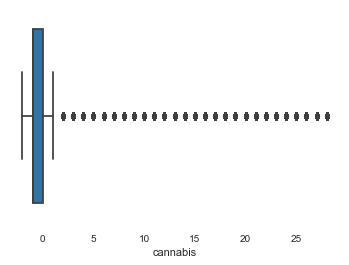

In [49]:
bxplt(df['cannabis'])

In [50]:
df['amphetamines'].value_counts()

-1.0     507348
 0.0      59216
 1.0       1832
 28.0      1640
 2.0       1023
 3.0        629
 4.0        496
 5.0        439
 10.0       300
 7.0        294
-2.0        231
 20.0       215
 6.0        211
 14.0       196
 15.0       147
 27.0       136
 8.0        125
 25.0        92
 24.0        91
 9.0         77
 12.0        65
 26.0        64
 22.0        61
 23.0        59
 11.0        43
 21.0        38
 18.0        38
 19.0        34
 16.0        29
 17.0        23
 13.0        18
Name: amphetamines, dtype: int64

In [51]:
df['cocaine'].value_counts()

-1.0     491189
 0.0      76735
 1.0       2961
 2.0       1217
 3.0        684
 4.0        530
 5.0        340
 7.0        208
 6.0        188
 10.0       167
 28.0       157
 8.0        138
-2.0        134
 14.0        93
 20.0        75
 12.0        56
 9.0         47
 15.0        46
 27.0        36
 25.0        32
 17.0        21
 16.0        21
 11.0        19
 19.0        18
 24.0        18
 18.0        17
 23.0        15
 21.0        13
 22.0        13
 26.0        12
 13.0        10
Name: cocaine, dtype: int64

In [52]:
df['lsd'].value_counts()

-1.0     502197
 0.0      69504
 1.0       2175
 2.0        520
 3.0        182
-2.0        150
 4.0        112
 5.0         70
 28.0        56
 7.0         43
 6.0         36
 8.0         29
 10.0        26
 27.0        21
 9.0         15
 14.0         9
 12.0         9
 24.0         9
 20.0         8
 11.0         7
 18.0         6
 13.0         4
 26.0         4
 17.0         4
 15.0         3
 23.0         3
 19.0         2
 22.0         2
 25.0         2
 21.0         1
 16.0         1
Name: lsd, dtype: int64

In [53]:
df['mdma'].value_counts()


-1.0     500992
 0.0      71143
 1.0       1809
 2.0        416
 3.0        184
-2.0        163
 4.0        108
 5.0         91
 28.0        44
 7.0         39
 6.0         37
 10.0        33
 8.0         31
 9.0         22
 20.0        13
 27.0        12
 14.0        12
 11.0        10
 15.0         8
 26.0         6
 18.0         5
 17.0         5
 22.0         4
 13.0         4
 24.0         4
 12.0         4
 25.0         3
 21.0         3
 16.0         3
 23.0         1
 19.0         1
Name: mdma, dtype: int64

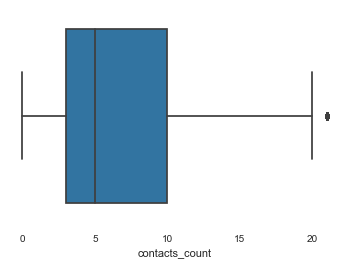

In [54]:
bxplt(df['contacts_count'])

### Behaviors: House Count, Contacts Count, Text Working, Rate Reducing Single, Rate Reducing Mask

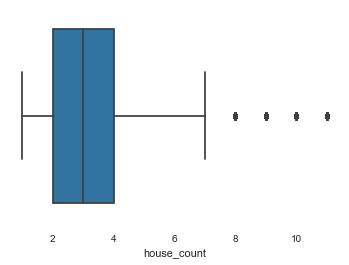

In [55]:
bxplt(df['house_count'])

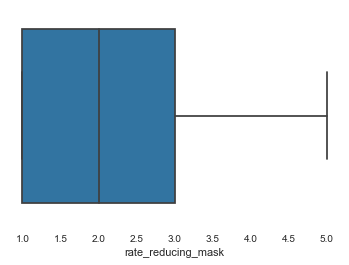

In [56]:
bxplt(df['rate_reducing_mask'])

In [57]:
df.head()

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True


## Further scrubbing and preprocessing;
>* Changing the daatatypes of objects to categories and encoding 
* Dropping additional columns
* Setting the target: "covid19_positive"
* Train/Test Split
* Inspecting Imbalences
   

### Pairing the size of the dataset/changing objects to categories:

In [58]:
df.columns

Index(['country', 'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi',
       'blood_type', 'smoking', 'alcohol', 'cannabis', 'amphetamines',
       'cocaine', 'lsd', 'mdma', 'contacts_count', 'house_count',
       'text_working', 'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic',
       'prescription_medication', 'opinion_infection', 'opinion_mortality',
       'risk_infection', 'risk_mortality', 'omwasnull', 'oiwasnull',
       'taking_prescription_medication'],
      dtype='object')

In [59]:
df.astype({'country' : 'category', 'sex' : 'category', 'blood_type' : 'category',
           'smoking': 'category', 'text_working' : 'category', 'prescription_medication' : 'category'})

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619022,CA,5.0,female,25,168,94,33.3,unknown,never,2.0,4.0,-1.0,-1.0,-1.0,-1.0,3.0,3,stopped,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,57.835,0.017,False,False,False
619023,US,5.0,female,35,174,124,40.9,op,never,1.0,14.0,-1.0,-1.0,-1.0,-1.0,10.0,5,home,0,1,1,3.0,0,0,0,0,0,0,0,0,0,0,1,0,NO,55.0,25.0,59.874,0.078,False,False,False
619024,US,5.0,female,45,166,74,26.8,unknown,never,1.0,-1.0,28.0,-1.0,-1.0,-1.0,21.0,4,travel critical,-1,1,2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXT...,85.0,5.0,67.718,0.294,False,False,True
619025,US,20.0,female,45,166,90,32.6,an,quit10,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0,2,travel critical,1,1,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,ALPRAZOLAM;HYDROXYZINE HYDROCHLORIDE;MONTELUKA...,25.0,15.0,72.490,0.582,False,False,True


### Additional columns dropped: 

**ip_accuracy** - This feature measures the accuracy of the IP location and is used in the data collection process rather than for predicting a medical condition.

**risk_infection** - This is a value calculated post-hoc, based on the data collected from this dataset

**risk_mortality** - This is a value calculated post-hoc, based on the data collected from this dataset

**prescription_medication** - This column contains text-strings and has over 57K values.  It's proposed to deal with this column separately if it's indicated to be a factor separately since this is computationally expensive.

In [60]:
df.drop('ip_accuracy', axis=1, inplace=True)


In [61]:
df.drop('risk_infection', axis=1, 
        inplace=True)

In [62]:
df.drop('risk_mortality', axis=1, inplace=True)

In [63]:
df1 = df.drop('prescription_medication', axis=1)

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575210 entries, 0 to 619026
Data columns (total 38 columns):
country                           575210 non-null object
sex                               575210 non-null object
age                               575210 non-null int64
height                            575210 non-null int64
weight                            575210 non-null int64
bmi                               575210 non-null float64
blood_type                        575210 non-null object
smoking                           575210 non-null object
alcohol                           575210 non-null float64
cannabis                          575210 non-null float64
amphetamines                      575210 non-null float64
cocaine                           575210 non-null float64
lsd                               575210 non-null float64
mdma                              575210 non-null float64
contacts_count                    575210 non-null float64
house_count                  

### Encoding dataset

In [65]:
df2 = pd.get_dummies(df1)
df2.head()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,omwasnull,oiwasnull,taking_prescription_medication,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
0,45,158,114,45.6,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,55.0,35.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,25,168,62,21.9,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,5,136,44,23.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,15.0,True,True,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,35,164,112,41.6,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,45.0,25.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,55,184,132,38.9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,15.0,5.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [66]:
df2.describe()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,country_AR,country_AT,country_AU,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
count,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.00000,575210.000000,575210.000000,...,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000
mean,38.048295,169.063834,86.105141,30.037971,2.672372,2.375988,-0.726154,-0.801010,-0.857699,-0.856922,7.399658,3.190734,0.321573,1.013882,0.869884,2.365046,0.001375,0.016495,0.035511,0.161657,0.003100,0.061310,0.015657,0.012322,0.059789,0.003077,0.128171,0.075206,36.089480,20.279585,0.000002,0.000209,0.000012,0.000003,0.000007,0.000019,0.000016,0.00025,0.000177,0.010888,...,0.000024,0.000101,0.000231,0.000009,0.880816,0.000017,0.000007,0.000014,0.000061,0.000061,0.000002,0.000002,0.000982,0.000007,0.000005,0.700464,0.295911,0.003625,0.010838,0.033906,0.049412,0.186834,0.016128,0.062542,0.088130,0.214051,0.338160,0.568293,0.057629,0.096393,0.060183,0.065533,0.017781,0.046254,0.087933,0.062092,0.159272,0.434109,0.259803,0.084724
std,13.437588,11.101964,24.486852,8.044168,4.177297,8.075127,1.924783,0.933992,0.562558,0.543600,6.746050,1.553937,0.858836,0.553701,0.654685,1.219106,0.037058,0.127369,0.185066,0.368137,0.055589,0.239898,0.124144,0.110321,0.237095,0.055387,0.334280,0.263723,20.097658,19.947894,0.001319,0.014442,0.003488,0.001865,0.002637,0.004373,0.003956,0.01582,0.013315,0.103777,...,0.004933,0.010041,0.015204,0.002948,0.324006,0.004169,0.002637,0.003729,0.007800,0.007800,0.001319,0.001319,0.031325,0.002637,0.002284,0.458055,0.456452,0.060097,0.103539,0.180987,0.216726,0.389779,0.125968,0.242138,0.283483,0.410162,0.473084,0.495314,0.233041,0.295129,0.237826,0.247463,0.132156,0.210036,0.283198,0.241323,0.365930,0.495640,0.438527,0.278471
min,5.000000,110.000000,44.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,

## Train/Test Split:

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
y = df2['covid19_positive'].copy()
X = df2.drop('covid19_positive', axis=1).copy()


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, stratify=y, random_state=123)

In [70]:
len(X_test)

115042

In [71]:
len(y_test)

115042

In [72]:
len(y_train)

460168

In [73]:
len(X_train)

460168

### Inspecting training set  for imbalance 

In [74]:
y_train.value_counts()

0    459535
1       633
Name: covid19_positive, dtype: int64

In [75]:
y_test.value_counts()

0    114884
1       158
Name: covid19_positive, dtype: int64

## Modeling:  Using 'vanilla' Decision Tree and SMOTE to address imbalances

* Also using the parameter of class_weight='balanced' to address the large imbalance in classes.




In [236]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_res).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

1    459535
0    459535
dtype: int64


In [237]:
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [238]:
y_hat_test = tree.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.998,0.998,114884.000
1,0.071,0.114,0.087,158.000
accuracy,0.997,0.997,0.997,0.997
macro avg,0.535,0.556,0.543,115042.000
weighted avg,0.998,0.997,0.997,115042.000


___________________________________________


Training Accuracy :  0.9999989119435951
Test Accuracy :  0.9967229359712105
___________________________________________


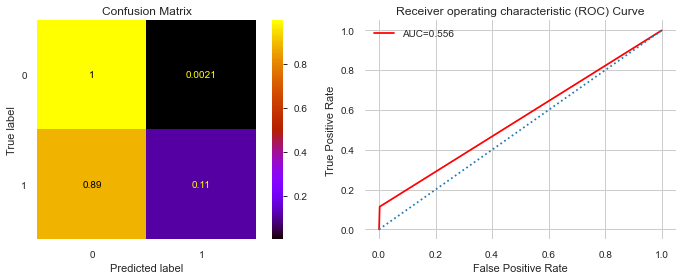

In [239]:
fn.evaluate_model(X_test, y_test, y_hat_test, X_train_res, y_train_res, tree)

In [225]:
importlib.reload(fn)

2020-04-20 22:22:15.540589-07:00
[i] Timer started at04/20/20 - 10:22 PM
[i] Timer ended at 04/20/20 - 10:22 PM
- Total time = 0:00:00.000936


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [231]:
print(pd.Series(y_train_res).value_counts()) 

1    459535
0    459535
dtype: int64


Looking at factors:

In [230]:
df_import = pd.DataFrame(tree.feature_importances_, X_train.columns)
df_import.reset_index(inplace=True)
df_import.columns = ['factor', 'coef']
df_import.sort_values('coef', ascending=False).head(20)

,factor,coef
16,covid19_symptoms,0.328299
27,opinion_infection,0.299632
228,text_working_travel critical,0.047703
29,omwasnull,0.038124
13,rate_reducing_risk_single,0.032097
17,covid19_contact,0.030256
30,oiwasnull,0.029041
215,blood_type_op,0.017667
213,blood_type_bp,0.014946
23,diabetes,0.012244


#### Observations for first vanilla DecisionTree Classifier using SMOTE:

> This model out of the box trained very poorly.  It is obviously overtrained and the recall and precision for true positives leave much to be desired with a recall of ~.11

Recording top factors: 

1. covid19_symptoms	0.328299
2.	opinion_infection	0.299632
3.	text_working_travel critical	0.047703
4. omwasnull	0.038124
5.	rate_reducing_risk_single	0.032097
6.	covid19_contact	0.030256
7.	oiwasnull	0.029041
8.	blood_type_op	0.017667
9.	blood_type_bp	0.014946
10.	diabetes	0.012244
11.	other_chronic	0.010916
12.	text_working_never	0.010275



In [88]:
#fn.df_importance(tree)

In [232]:

#df_import_tree = pd.Series(tree.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_tree.sort_values().plot(kind='barh', figsize=(15,12))

In [169]:
importlib.reload(fn)

2020-04-20 21:35:10.592680-07:00
[i] Timer started at04/20/20 - 09:35 PM
[i] Timer ended at 04/20/20 - 09:35 PM
- Total time = 0:00:00.000997


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

#### using UnderSampling

In [240]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

In [241]:
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)


In [245]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=4)
clf.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [246]:
y_hat_test1 = clf.predict(X_test)


,precision,recall,f1-score,support
0,0.999,0.741,0.851,114884.000
1,0.004,0.677,0.007,158.000
accuracy,0.741,0.741,0.741,0.741
macro avg,0.501,0.709,0.429,115042.000
weighted avg,0.998,0.741,0.850,115042.000


___________________________________________


Training Accuracy :  1.0
Test Accuracy :  0.7410945567705708
___________________________________________


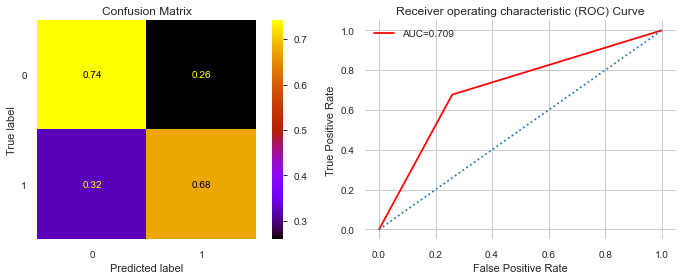

In [247]:
fn.evaluate_model(X_test, y_test, y_hat_test1, X_train_rus, y_train_rus, clf)

In [96]:
importlib.reload(fn)

2020-04-20 19:21:19.165440-07:00
[i] Timer started at04/20/20 - 07:21 PM
[i] Timer ended at 04/20/20 - 07:21 PM
- Total time = 0:00:00.000997


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [248]:
# df_import_clf = pd.Series(clf.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_clf.sort_values().plot(kind='barh', figsize=(15,12))

In [249]:
df_import = pd.DataFrame(clf.feature_importances_, X_train.columns)
df_import.reset_index(inplace=True)
df_import.columns = ['feature', 'coef']
df_import.sort_values('coef', ascending=False).head(20)

,feature,coef
27,opinion_infection,0.255014
16,covid19_symptoms,0.174789
3,bmi,0.067712
4,alcohol,0.036989
1,height,0.033449
29,omwasnull,0.033211
2,weight,0.032726
11,house_count,0.032467
0,age,0.028856
28,opinion_mortality,0.027823


#### Observations:
> This model performed poorly and is overfit, and f-1 scores were considerably lower.  The best sampling method in terms of performance appears to be SMOTE despite improved recall scores.

Recording top factors:
27	opinion_infection	0.255014
16	covid19_symptoms	0.174789
3	bmi	0.067712
4	alcohol	0.036989
1	height	0.033449
29	omwasnull	0.033211
2	weight	0.032726
11	house_count	0.032467
0	age	0.028856
28	opinion_mortality	0.027823
10	contacts_count	0.025779
5	cannabis	0.023150
15	rate_reducing_mask	0.021918
13	rate_reducing_risk_single	0.018350

### Using GridSearchCV to optimize the DecisionTree

In [252]:
from sklearn.model_selection import GridSearchCV


dt_clf1 = DecisionTreeClassifier(class_weight='balanced', random_state=420)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[7,8,10,15],
             'max_features':[60, 70, 80, 85, 90,100]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(dt_clf1, param_grid)

In [253]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_res, y_train_res)
time.stop()

[i] Timer started at04/20/20 - 11:14 PM
[i] Timer ended at 04/21/20 - 12:31 AM
- Total time = 1:17:24.491018


In [254]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

The best parameters via GridSearchCV: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 70}


In [255]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=70, random_state=12)
clf2.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=70, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [256]:
y_hat_test2 = clf2.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.997,0.998,114884.000
1,0.026,0.057,0.035,158.000
accuracy,0.996,0.996,0.996,0.996
macro avg,0.512,0.527,0.517,115042.000
weighted avg,0.997,0.996,0.997,115042.000


___________________________________________


Training Accuracy :  0.7654028436018957
Test Accuracy :  0.9957406860103266
___________________________________________


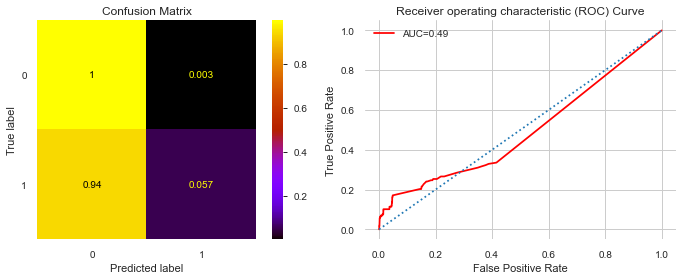

In [257]:
fn.evaluate_model(X_test,y_test, y_hat_test2, X_train_rus, y_train_rus, clf2)

In [258]:
# df_import_clf2 = pd.Series(clf2.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_clf2.sort_values().plot(kind='barh', figsize=(15,12))

In [110]:
### Grid Searching SMOTE 

In [259]:
grid_clf.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=420,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=

In [260]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

The best parameters via GridSearchCV: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 85}


#### Applying best parameters from GridSearch

In [278]:
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=85, random_state=68)
clf3.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=85, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=68, splitter='best')

In [279]:
y_hat_test3 = clf3.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.829,0.906,114884.000
1,0.005,0.646,0.010,158.000
accuracy,0.829,0.829,0.829,0.829
macro avg,0.502,0.737,0.458,115042.000
weighted avg,0.998,0.829,0.905,115042.000


___________________________________________


Training Accuracy :  0.8436018957345972
Test Accuracy :  0.8291319691938597
___________________________________________


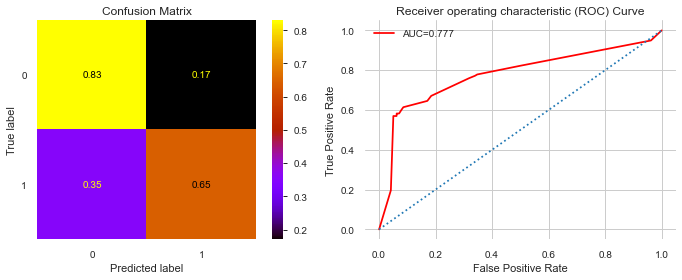

In [280]:
fn.evaluate_model(X_test, y_test, y_hat_test3, X_train_rus, y_train_rus, clf3)

In [277]:
    df_import = pd.DataFrame(clf3.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

,feature,coef
27,opinion_infection,0.404759
17,covid19_contact,0.170897
16,covid19_symptoms,0.103537
30,oiwasnull,0.039747
2,weight,0.031011
4,alcohol,0.028963
15,rate_reducing_mask,0.028545
205,sex_female,0.022941
31,taking_prescription_medication,0.017174
0,age,0.015920


#### Observations: 
Interesting that the testing accuracy is higher than the training accuracy. 
> Top Features: 
1. Covid19 Contact
2. Covid19 Symptoms
3. bmi
4. weight
5. rate_reducing_risk_house
6. cannabis
7. rate_reducing_risk_single
8. rate_reducing_mask
9. age
10. contacts_count
11. alcohol
12. house_count
13. height


### Gridsearch on Random Forest using Undersampling:

In [290]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced')
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[7,10,15],
             'max_features':[70, 80, 85, 90,100],
             'n_estimators' :[75,100,125, 150]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(rf_clf, param_grid)

In [291]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_rus, y_train_rus)
time.stop()

[i] Timer started at04/21/20 - 06:14 AM
[i] Timer ended at 04/21/20 - 06:19 AM
- Total time = 0:04:51.455683


In [292]:
print(f" Best parameters found via GridSearchCV:{grid_clf.best_params_}")

 Best parameters found via GridSearchCV:{'criterion': 'gini', 'max_depth': 10, 'max_features': 80, 'n_estimators': 75}


#### Applying best parameters found via GriSearchCV

In [293]:
rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features=80, n_estimators=75, random_state=123)

rf_clf.fit(X_train_rus, y_train_rus)

mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train_rus, y_train_rus, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 80.33%


In [294]:
y_hat_test2 = rf_clf.predict(X_test)

,precision,recall,f1-score,support
0,1.000,0.907,0.951,114884.000
1,0.010,0.709,0.020,158.000
accuracy,0.906,0.906,0.906,0.906
macro avg,0.505,0.808,0.486,115042.000
weighted avg,0.998,0.906,0.949,115042.000


___________________________________________


Training Accuracy :  0.9257503949447078
Test Accuracy :  0.9062429373620069
___________________________________________


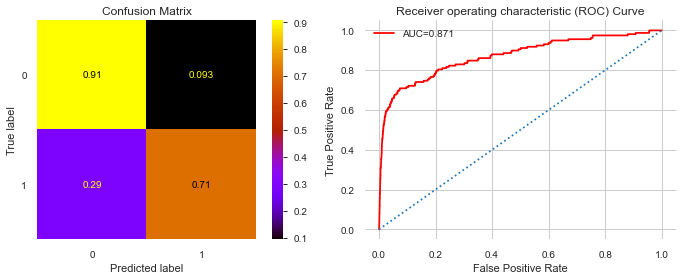

In [295]:
fn.evaluate_model(X_test, y_test, y_hat_test2, X_train_rus, y_train_rus, rf_clf)

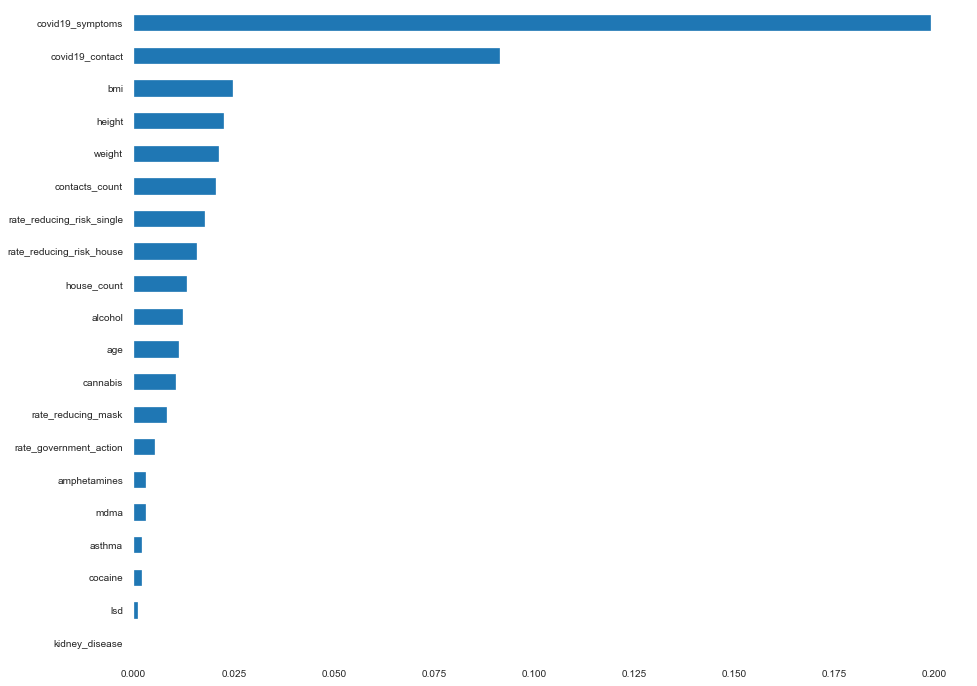

In [137]:
df_import_clf = pd.Series(rf_clf.feature_importances_, index=X_train.columns, name='importance').head(20)
df_import_clf.sort_values().plot(kind='barh', figsize=(15,12))

#### Observations using Random Forest Classifier:

> Still having trouble with precision and classifying true positives.  
Top factors remain:
1. Covid19 Symptoms
2. Covid19 Contact
3. bmi
4. weight
5. rate_reducing_single
6. height
7. rate_reducing_risk_house
8. contacts_count
9. age
10. alcohol
11. cannabis
12. rate_reducing_mask 
and 
13. house_count

### Trying XGBoost

In [138]:
## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier
## Fit and Evaluate

xgb_rf = XGBRFClassifier()





In [139]:
xgb_rf.fit(X_train_rus,y_train_rus)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
                n_jobs=1, nthread=None, objective='binary:logistic',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [ ]:
print(xgb_rf.score(X_train_rus,y_train_rus))


In [140]:
xgb_rf.predict(X_test)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229'] ['age', 'height', 'weight', 'bmi', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count', 'house_count', 'rate_government_action', 'rate_reducing_risk_single', 'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection', 'opinion_mortality', 'omwasnull', 'oiwasnull', 'taking_prescription_medication', 'country_AD', 'country_AE', 'country_AF', 'country_AG', 'country_AI', 'country_AL', 'country_AM', 'country_AR', 'country_AT', 'country_AU', 'country_AW', 'country_AZ', 'country_BA', 'country_BB', 'country_BD', 'country_BE', 'country_BG', 'country_BH', 'country_BM', 'country_BN', 'country_BO', 'country_BQ', 'country_BR', 'country_BS', 'country_BW', 'country_BY', 'country_BZ', 'country_CA', 'country_CH', 'country_CI', 'country_CL', 'country_CM', 'country_CN', 'country_CO', 'country_CR', 'country_CU', 'country_CY', 'country_CZ', 'country_DE', 'country_DJ', 'country_DK', 'country_DM', 'country_DO', 'country_DZ', 'country_EC', 'country_EE', 'country_EG', 'country_ES', 'country_ET', 'country_FI', 'country_FJ', 'country_FO', 'country_FR', 'country_GA', 'country_GB', 'country_GD', 'country_GE', 'country_GG', 'country_GH', 'country_GI', 'country_GM', 'country_GN', 'country_GR', 'country_GT', 'country_GU', 'country_HK', 'country_HN', 'country_HR', 'country_HT', 'country_HU', 'country_ID', 'country_IE', 'country_IL', 'country_IN', 'country_IQ', 'country_IR', 'country_IS', 'country_IT', 'country_JE', 'country_JM', 'country_JO', 'country_JP', 'country_KE', 'country_KG', 'country_KH', 'country_KR', 'country_KW', 'country_KY', 'country_KZ', 'country_LA', 'country_LB', 'country_LC', 'country_LI', 'country_LK', 'country_LT', 'country_LU', 'country_LV', 'country_LY', 'country_MA', 'country_MC', 'country_MD', 'country_ME', 'country_MG', 'country_MK', 'country_ML', 'country_MM', 'country_MN', 'country_MO', 'country_MT', 'country_MU', 'country_MV', 'country_MW', 'country_MX', 'country_MY', 'country_MZ', 'country_NE', 'country_NG', 'country_NI', 'country_NL', 'country_NO', 'country_NP', 'country_NZ', 'country_OM', 'country_PA', 'country_PE', 'country_PG', 'country_PH', 'country_PK', 'country_PL', 'country_PR', 'country_PS', 'country_PT', 'country_PY', 'country_QA', 'country_RO', 'country_RS', 'country_RU', 'country_RW', 'country_SA', 'country_SC', 'country_SD', 'country_SE', 'country_SG', 'country_SI', 'country_SK', 'country_SN', 'country_SR', 'country_SV', 'country_SX', 'country_SY', 'country_SZ', 'country_TC', 'country_TG', 'country_TH', 'country_TJ', 'country_TN', 'country_TO', 'country_TR', 'country_TT', 'country_TW', 'country_UA', 'country_UG', 'country_US', 'country_UY', 'country_UZ', 'country_VE', 'country_VI', 'country_VN', 'country_WS', 'country_YE', 'country_ZA', 'country_ZM', 'country_ZW', 'sex_female', 'sex_male', 'sex_other', 'blood_type_abn', 'blood_type_abp', 'blood_type_an', 'blood_type_ap', 'blood_type_bn', 'blood_type_bp', 'blood_type_on', 'blood_type_op', 'blood_type_unknown', 'smoking_never', 'smoking_quit0', 'smoking_quit10', 'smoking_quit5', 'smoking_vape', 'smoking_yesheavy', 'smoking_yeslight', 'smoking_yesmedium', 'text_working_home', 'text_working_never', 'text_working_stopped', 'text_working_travel critical', 'text_working_travel non critical']
expected f163, f94, f134, f40, f59, f133, f35, f125, f27, f182, f55, f10, f228, f128, f226, f22, f32, f60, f122, f136, f11, f218, f100, f50, f1, f149, f147, f144, f172, f74, f4, f154, f220, f205, f160, f115, f3, f156, f201, f107, f219, f64, f79, f103, f157, f46, f191, f146, f164, f36, f176, f116, f174, f109, f16, f216, f208, f73, f105, f175, f179, f120, f158, f71, f61, f76, f81, f223, f5, f162, f193, f104, f135, f215, f123, f200, f39, f177, f97, f18, f41, f181, f170, f217, f96, f112, f153, f84, f37, f43, f38, f207, f186, f82, f34, f171, f196, f214, f19, f117, f183, f141, f0, f2, f47, f102, f194, f21, f85, f72, f12, f78, f221, f195, f6, f70, f142, f203, f152, f227, f68, f57, f89, f222, f49, f198, f65, f129, f166, f13, f139, f161, f77, f106, f54, f48, f14, f108, f95, f130, f189, f169, f99, f7, f211, f127, f17, f188, f110, f165, f25, f28, f118, f137, f126, f192, f91, f90, f212, f151, f210, f56, f62, f167, f185, f20, f197, f23, f30, f93, f132, f111, f140, f31, f199, f145, f224, f213, f33, f180, f80, f51, f8, f119, f148, f190, f138, f53, f29, f67, f98, f114, f44, f69, f86, f206, f209, f101, f178, f184, f66, f83, f155, f45, f121, f159, f24, f131, f150, f52, f202, f15, f58, f75, f143, f42, f113, f88, f63, f229, f92, f187, f87, f26, f168, f9, f124, f204, f173, f225 in input data
training data did not have the following fields: country_LY, country_ML, country_UA, country_MM, country_BR, country_KE, country_MD, country_RU, country_HN, rate_government_action, country_CR, country_KR, country_SE, heart_disease, country_US, country_LT, age, cocaine, blood_type_bn, country_GM, country_HT, country_AI, country_MX, compromised_immune, country_NE, country_BO, country_SD, country_ME, country_EG, country_TW, sex_other, smoking_vape, country_CY, text_working_travel non critical, country_CZ, mdma, omwasnull, country_BE, country_DK, text_working_travel critical, country_PL, country_KY, country_FO, country_SA, sex_female, country_TH, country_PY, country_NG, smoking_yesmedium, text_working_never, country_MW, country_JE, country_PE, country_SI, country_NI, country_IE, country_PA, country_BB, country_SR, country_MY, country_VE, country_AM, country_BQ, country_LB, country_HK, country_JM, smoking_never, country_TT, country_PG, country_TN, rate_reducing_risk_single, country_NO, country_PS, country_DJ, smoking_yeslight, country_SZ, country_AG, country_BS, country_ZM, country_TO, bmi, country_MA, country_JP, country_SY, country_GI, country_MZ, smoking_quit10, country_MC, smoking_quit0, country_CH, country_RO, country_GE, country_AD, country_MU, height, country_AT, country_SC, country_UY, text_working_stopped, diabetes, blood_type_bp, country_NL, country_MV, country_LA, country_AU, country_YE, blood_type_on, country_LU, country_GA, country_QA, country_BZ, country_EE, country_BA, country_RS, country_TC, oiwasnull, hiv_positive, sex_male, rate_reducing_risk_house, asthma, lung_disease, country_GG, country_PR, country_KH, country_SX, country_TR, smoking_quit5, country_ET, country_PT, country_HU, blood_type_ap, country_GU, country_BN, country_KZ, smoking_yesheavy, covid19_contact, rate_reducing_mask, country_CO, country_BY, country_IQ, country_MO, country_BH, country_GB, country_SN, country_JO, country_AR, country_BG, covid19_symptoms, weight, country_CI, country_IN, country_TG, country_WS, country_CA, country_AZ, country_GN, house_count, country_FI, country_FJ, country_DO, country_IT, country_ZA, country_KW, country_TJ, country_HR, cannabis, country_DM, country_AW, kidney_disease, other_chronic, country_MK, country_GH, country_LK, country_PK, country_VI, alcohol, lsd, blood_type_an, country_CN, blood_type_unknown, country_EC, country_MT, country_CL, country_NP, country_SG, country_MN, country_FR, country_NZ, text_working_home, country_AF, country_IR, country_MG, country_ID, country_LC, country_BD, country_KG, country_AL, country_CU, country_OM, opinion_infection, country_DZ, country_GT, amphetamines, country_ES, country_LI, country_BW, country_PH, country_IS, country_DE, country_VN, hypertension, contacts_count, country_GD, country_SV, blood_type_abp, blood_type_abn, country_IL, country_LV, country_GR, opinion_mortality, country_ZW, taking_prescription_medication, country_AE, country_SK, country_CM, country_UG, country_RW, country_UZ, blood_type_op, country_BM

In [ ]:
fn.evaluate_model(y_test, y_pred ,X_true, clf)

In [ ]:
df_import_s = pd.Series(clf.feature_importances_, index=X_train.columns, name='importance')


## Appendix: 

In [ ]:
def _plot_classification_report(y_true, y_pred_class):
    import sklearn.metrics as metrics
    report = metrics.classification_report(y_true, y_pred_class, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(4)

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=report_df.values,
             colLabels=report_df.columns,
             rowLabels=report_df.index,
             loc='center',
             bbox=[0.2, 0.2, 0.8, 0.8])
    fig.tight_layout()

    return fig 